In [50]:
import numpy as np
import pandas as pd
from pathlib import Path
try:
    import seaborn as plt
except:
    from matplotlib import pyplot as plt

In [51]:
base_dir = Path('/mnt/blobfuse/train-output/offline-active-learning')
test_area_nums = [1] #, 2, 3, 4]
query_strategies = ['random'] #, 'entropy', 'margin']
finetune_methods = ['last_k_1', 'last_k_2', 'last_k_3', 'group_params'] #'dropout'

In [52]:
for area in test_area_nums:
    for strategy in query_strategies:
        results_file = base_dir / f'test{area}/{strategy}/fine_tune_test_results.csv'
        try:
            results = pd.read_csv(results_file)
        except:
            continue
        #for method in finetune_methods:
        #    print(results[method in results['method']])

In [53]:
results[[('last_k_1' in row) for row in results['method']]]

,method,num_points,area,random_seed,mean_IoU,pixel_accuracy,tile_path
0,last_k_layers_lr_0.010000_last_k_1,0,test1,1,0.480860,0.670016,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
1,last_k_layers_lr_0.010000_last_k_1,10,test1,1,0.540005,0.741829,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
2,last_k_layers_lr_0.010000_last_k_1,40,test1,1,0.592214,0.753755,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
3,last_k_layers_lr_0.010000_last_k_1,100,test1,1,0.597039,0.749592,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
4,last_k_layers_lr_0.010000_last_k_1,200,test1,1,0.620019,0.761903,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
5,last_k_layers_lr_0.010000_last_k_1,400,test1,1,0.641258,0.777743,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
6,last_k_layers_lr_0.010000_last_k_1,1000,test1,1,0.650023,0.776442,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
7,last_k_layers_lr_0.010000_last_k_1,2000,test1,1,0.652466,0.778140,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
32,last_k_layers_lr_0.010000_last_k_1,0,test1,2,0.480860,0.670016,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...
33,last_k_layers_lr_0.010000_last_k_1,10,test1,2,0.528915,0.697938,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...


In [54]:
results['last_k_1' in results[' num_points']]

KeyError: False

In [57]:
# %load offline-experiments.py


# In[4]:


get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
import sys, os, time


# In[3]:


get_ipython().system('ls /mnt/blobfuse/train-output/offline-active-learning/test1/random')


# In[ ]:


#mnt(/blobfuse/analysis/active-learning/test${i}/${strategy}/fine_tune_test_results.csv)

#where ${i} in 1, 2, 3, 4
#           ${strategy} is "random", "entropy", or "margin"


# In[59]:


test_areas = ["test1","test2","test3","test4"]
strategies = ["random", "entropy", "margin"]

dfs = []

for test_area in test_areas:
    for strategy in strategies:
        fn = "/mnt/blobfuse/train-output/offline-active-learning/%s/%s/fine_tune_test_results.csv" % (
            test_area, strategy
        )
        if os.path.exists(fn):
            try:
                df = pd.read_csv(fn)
                df["strategy"] = strategy
                df[" area"] = test_area
                dfs.append(df)
            except Exception as e:
                print(e, fn)
        else:
            print("%s does not exist" % (fn))
df = pd.concat(dfs)


# In[71]:


methods = [
    'last_k_layers_lr_0.010000_last_k_1',
    'last_k_layers_lr_0.005000_last_k_2',
    'last_k_layers_lr_0.001000_last_k_3',
    'group_params_lr_0.002500'
]
num_points = 400
num_seeds = 5
test_area = "test1"

mean_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
std_results = np.zeros((len(test_areas), len(strategies), len(methods), 2), dtype=float)
results[:] = np.nan

for i, test_area in enumerate(test_areas):
    for j, strategy in enumerate(strategies):
        for k, method_id in enumerate(methods):

            subset = df[
                (df[" area"] == test_area) &
                (df["strategy"] == strategy) &
                (df["method"] == method_id) &
                (df[" num_points"] == num_points)
            ]
            
            
            mean_results[i,j,k,0] = subset[' pixel_accuracy'].mean()
            mean_results[i,j,k,1] = subset[' mean_IoU'].mean()
            
            std_results[i,j,k,0] = subset[' pixel_accuracy'].std()
            std_results[i,j,k,1] = subset[' mean_IoU'].std()

# In[78]:



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
fine_tune_test_results.csv
No columns to parse from file /mnt/blobfuse/train-output/offline-active-learning/test4/margin/fine_tune_test_results.csv


In [71]:
print(methods)
for j, strategy in enumerate(strategies):
    print(strategy, end=' & ')
    for k, method_id in enumerate(methods):
        subset = df[
            (df[" num_points"] == 400) &
            (df["strategy"] == strategy) &
            (df["method"] == method_id)
        ]
        print(round(subset[' pixel_accuracy'].mean(), 3), end=' & ')
        print(round(subset[' mean_IoU'].mean(), 3), end=' & ')
        
    print(' \\\\')



['last_k_layers_lr_0.010000_last_k_1', 'last_k_layers_lr_0.005000_last_k_2', 'last_k_layers_lr_0.001000_last_k_3', 'group_params_lr_0.002500']
random & 0.809 & 0.597 & 0.827 & 0.667 & 0.827 & 0.64 & 0.795 & 0.542 &  \\
entropy & 0.736 & 0.501 & 0.731 & 0.587 & 0.765 & 0.572 & 0.76 & 0.52 &  \\
margin & 0.811 & 0.57 & 0.835 & 0.679 & 0.833 & 0.661 & 0.788 & 0.537 &  \\


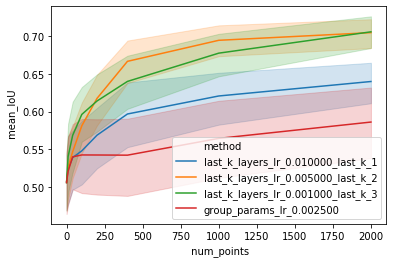

In [42]:
subset = df[ (df["strategy"] == 'random') ]
sns.lineplot(x=' num_points', y=' mean_IoU', hue='method', data=subset)

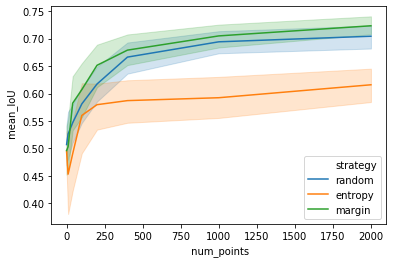

In [43]:
subset = df[ (df["method"] == 'last_k_layers_lr_0.005000_last_k_2') ]
sns.lineplot(x=' num_points', y=' mean_IoU', hue='strategy', data=subset)

In [47]:
subset = df[ df[" num_points"] == 400 ]
subset

,method,num_points,area,random_seed,mean_IoU,pixel_accuracy,tile_path,strategy
5,last_k_layers_lr_0.010000_last_k_1,400,test1,1,0.641258,0.777743,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
13,last_k_layers_lr_0.005000_last_k_2,400,test1,1,0.681291,0.802323,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
21,last_k_layers_lr_0.001000_last_k_3,400,test1,1,0.686411,0.799695,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
29,group_params_lr_0.002500,400,test1,1,0.596780,0.761106,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
37,last_k_layers_lr_0.010000_last_k_1,400,test1,2,0.582335,0.769844,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
45,last_k_layers_lr_0.005000_last_k_2,400,test1,2,0.669128,0.797871,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
53,last_k_layers_lr_0.001000_last_k_3,400,test1,2,0.661732,0.796767,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
61,group_params_lr_0.002500,400,test1,2,0.571433,0.759090,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
69,last_k_layers_lr_0.010000_last_k_1,400,test1,3,0.626819,0.773840,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random
77,last_k_layers_lr_0.005000_last_k_2,400,test1,3,0.691944,0.798601,/mnt/blobfuse/esri-naip/data/v1/2013/states/n...,random


In [35]:
for i, test_area in enumerate(test_areas):
    print(test_area)
    print(pd.DataFrame(mean_results[i,:,:,0], index=strategies, columns=methods).to_csv())
    print(pd.DataFrame(std_results[i,:,:,0], index=strategies, columns=methods).to_csv())

test1
,last_k_layers_lr_0.010000_last_k_1,last_k_layers_lr_0.005000_last_k_2,last_k_layers_lr_0.001000_last_k_3,group_params_lr_0.002500
random,0.7747432,0.7979252,0.795304,0.760165
entropy,0.6717740000000001,0.6768524000000001,0.7413234,0.7063974
margin,0.7773922000000001,0.807272,0.8052847999999999,0.7631008

,last_k_layers_lr_0.010000_last_k_1,last_k_layers_lr_0.005000_last_k_2,last_k_layers_lr_0.001000_last_k_3,group_params_lr_0.002500
random,0.0030851610492809265,0.004084564260725998,0.003550964798473764,0.0028050838668389603
entropy,0.03641015501889552,0.08092595625199618,0.01952443836068018,0.00830647923611447
margin,0.001737761692522838,0.0030033245745340283,0.0005789911052857541,0.0017743476829528188

test2
,last_k_layers_lr_0.010000_last_k_1,last_k_layers_lr_0.005000_last_k_2,last_k_layers_lr_0.001000_last_k_3,group_params_lr_0.002500
random,0.7992722000000001,0.8152484000000001,0.8157862,0.7734972
entropy,0.7355425999999999,0.7258983999999999,0.7860790000000001,0.76904060000

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


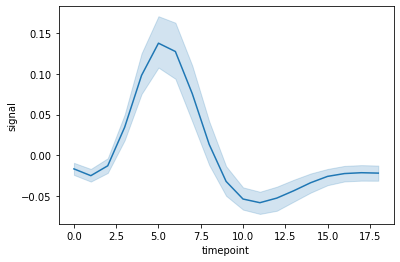

In [40]:
fmri = plt.load_dataset('fmri')
ax = plt.lineplot(x='timepoint', y='signal', data=fmri)
fmri
